### Import

In [106]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
%matplotlib inline
data_is_formated = True

### Open

In [107]:
df_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

df_data.replace(to_replace='Sky is Clear', value='sky is clear', inplace=True)

### Verificando atributos incompletos

In [108]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Duplicatas

In [110]:
df_data[df_data.duplicated(keep=False)].head(5)

df_data.drop_duplicates(keep='last', inplace=True)
df_data[df_data.duplicated()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume


Convertendo 

In [112]:
LE = LabelEncoder()
df_data['weather_main'] = LE.fit_transform(df_data['weather_main'])
df_data['weather_description'] = LE.fit_transform(df_data['weather_description'])
df_data['holiday'] = LE.fit_transform(df_data['holiday'])
df_data.head(2)

if data_is_formated:
    traffic_volume = df_data.pop('traffic_volume')
    df_data['date_time'] = pd.to_datetime(df_data['date_time'], errors='raise')
    df_data['day_of_week'] = pd.to_datetime(df_data['date_time'], errors='raise').dt.dayofweek
    df_data['date_time'] = pd.to_datetime(df_data['date_time'], errors='raise').dt.hour
    df_data['traffic_volume'] = traffic_volume
    data_is_formated = False
df_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
0,7,288.28,0.0,0.0,40,1,23,9,1,5545
1,7,289.36,0.0,0.0,75,1,1,10,1,4516
2,7,289.58,0.0,0.0,90,1,18,11,1,4767
3,7,290.13,0.0,0.0,90,1,18,12,1,5026
4,7,291.14,0.0,0.0,75,1,1,13,1,4918
...,...,...,...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,75,1,1,19,6,3543
48200,7,282.76,0.0,0.0,90,1,18,20,6,2781
48201,7,282.73,0.0,0.0,90,10,20,21,6,2159
48202,7,282.09,0.0,0.0,90,1,18,22,6,1450


### Normalização

In [113]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfOnlyNumericsData = df_data.select_dtypes(numeric_types)
dfOnlyNumericsData.head(1)

df_normalized = df_data.copy()
for column in dfOnlyNumericsData:
    if column == 'traffic_volume':
        break
    normalized_column = (dfOnlyNumericsData[column] - dfOnlyNumericsData[column].min())/(dfOnlyNumericsData[column].max() - dfOnlyNumericsData[column].min())
    df_normalized[column] = normalized_column
    
pd.DataFrame([df_normalized.min(), df_normalized.max()], index= ['Min', 'Max'])

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0


### Correlação

In [114]:
corr_matrix = df_normalized.corr().abs()
corr_matrix.style.background_gradient('coolwarm').set_precision(2)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
holiday,1,0.00047,6.6e-05,0.00043,0.0071,0.0043,0.0082,0.026,0.021,0.019
temp,0.00047,1,0.0091,0.02,0.1,0.033,0.026,0.11,0.0078,0.13
rain_1h,6.6e-05,0.0091,1,9e-05,0.0048,0.0095,0.01,0.0034,0.0069,0.0047
snow_1h,0.00043,0.02,9e-05,1,0.028,0.037,0.0024,0.0099,0.015,0.00074
clouds_all,0.0071,0.1,0.0048,0.028,1,0.5,0.49,0.055,0.04,0.067
weather_main,0.0043,0.033,0.0095,0.037,0.5,1,0.23,0.054,0.039,0.04
weather_description,0.0082,0.026,0.01,0.0024,0.49,0.23,1,0.016,0.028,0.061
date_time,0.026,0.11,0.0034,0.0099,0.055,0.054,0.016,1,0.0038,0.35
day_of_week,0.021,0.0078,0.0069,0.015,0.04,0.039,0.028,0.0038,1,0.15
traffic_volume,0.019,0.13,0.0047,0.00074,0.067,0.04,0.061,0.35,0.15,1


### Outliers

In [121]:
#

### KNN

In [122]:
X = df_normalized.iloc[:,:-1].values
Y = df_normalized.iloc[:,-1:].values

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor(n_neighbors=17).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

r2_score(Y_test, Y_pred)

0.9076104690048761

C:\Users\prial\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


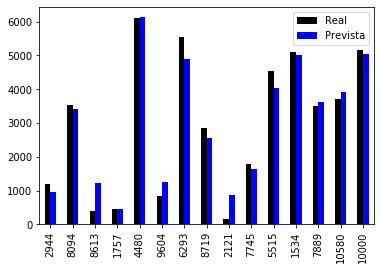

In [128]:
graphPredReal = pd.DataFrame({'Real': Y_test.flatten(), 'Prevista': Y_pred.flatten()})
graphPredRealPlot = graphPredReal.sample(15)
graphPredRealPlot.plot.bar(orientation='vertical', colors=['black', 'blue'])

In [129]:
X = df_normalized.iloc[:,:-1].values
Y = df_normalized.iloc[:,-1:].values

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor(n_neighbors=17).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

r2_score(Y_test, Y_pred)

0.9064389449171398

C:\Users\prial\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


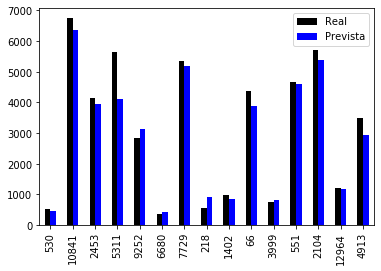

In [130]:
graphPredReal = pd.DataFrame({'Real': Y_test.flatten(), 'Prevista': Y_pred.flatten()})
graphPredRealPlot = graphPredReal.sample(15)
graphPredRealPlot.plot.bar(orientation='vertical', colors=['black', 'blue'])

In [131]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_train, Y_train, cv=10)
Y_pred = knn.predict(X_test)
print('cv scores de : {}\nmédia de : {}'.format(cv_scores, cv_scores.mean()))

cv = [0.91230946, 0.90724507, 0.90557015, 0.90810872, 0.90461817, 0.90847381, 0.90671871, 0.90993087, 0.91679691, 0.90476481]
média = 0.9084536677533176

cv scores de : [0.91230946 0.90724507 0.90557015 0.90810872 0.90461817 0.90847381
 0.90671871 0.90993087 0.91679691 0.90476481]
média de : 0.9084536677533176


In [132]:
cv = [0.91230946, 0.90724507, 0.90557015, 0.90810872, 0.90461817, 0.90847381, 0.90671871, 0.90993087, 0.91679691, 0.90476481]
média = 0.9084536677533176

print("## Score validação cruzada\n")
print(cv)

## Score validação cruzada

[0.91230946, 0.90724507, 0.90557015, 0.90810872, 0.90461817, 0.90847381, 0.90671871, 0.90993087, 0.91679691, 0.90476481]
